# Afrobeats Recommender

# EDA

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

from scipy import sparse
import plotly.express as px
import time

## Import dataframe

In [314]:
df_raw = pd.read_csv('../data/raw.csv')
df_raw.head()

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,{'external_urls': {'spotify': 'https://open.sp...,3tVQdUvClmAT7URs9V3rsp,80,"['afro dancehall', 'afropop', 'azonto', 'niger...",Superstar,49,0.879,...,2,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,{'external_urls': {'spotify': 'https://open.sp...,520qA5VGL9iI0SbmEnTVNg,60,"['afro dancehall', 'afropop', 'azontobeats', '...",The Matter (feat. Wizkid),48,0.697,...,2,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,{'external_urls': {'spotify': 'https://open.sp...,0LFsP7WPfu5inz9a1amcE4,52,"['afro dancehall', 'afropop', 'azonto', 'azont...",Refuse to Be Broke: Da Revolution 2,53,0.520,...,6,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550,afrobeats


#### Get only needed features and song name

In [315]:
features = ['track_name','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']

In [316]:
df = df_raw[features]

In [317]:
df.head()

,track_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Oleku (feat. Brymo),0.544,0.730,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,Move Back,0.793,0.734,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats
2,Pakurumo,0.879,0.737,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990,afrobeats
3,The Matter (feat. Wizkid),0.697,0.841,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070,afrobeats
4,Slow Down (feat. Wiz Kid),0.520,0.717,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550,afrobeats


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        190 non-null    object 
 1   danceability      190 non-null    float64
 2   energy            190 non-null    float64
 3   loudness          190 non-null    float64
 4   mode              190 non-null    int64  
 5   speechiness       190 non-null    float64
 6   acousticness      190 non-null    float64
 7   instrumentalness  190 non-null    float64
 8   liveness          190 non-null    float64
 9   valence           190 non-null    float64
 10  tempo             190 non-null    float64
 11  genre             190 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 17.9+ KB


In [319]:
df.shape

(190, 12)

Perform some EDA on the features

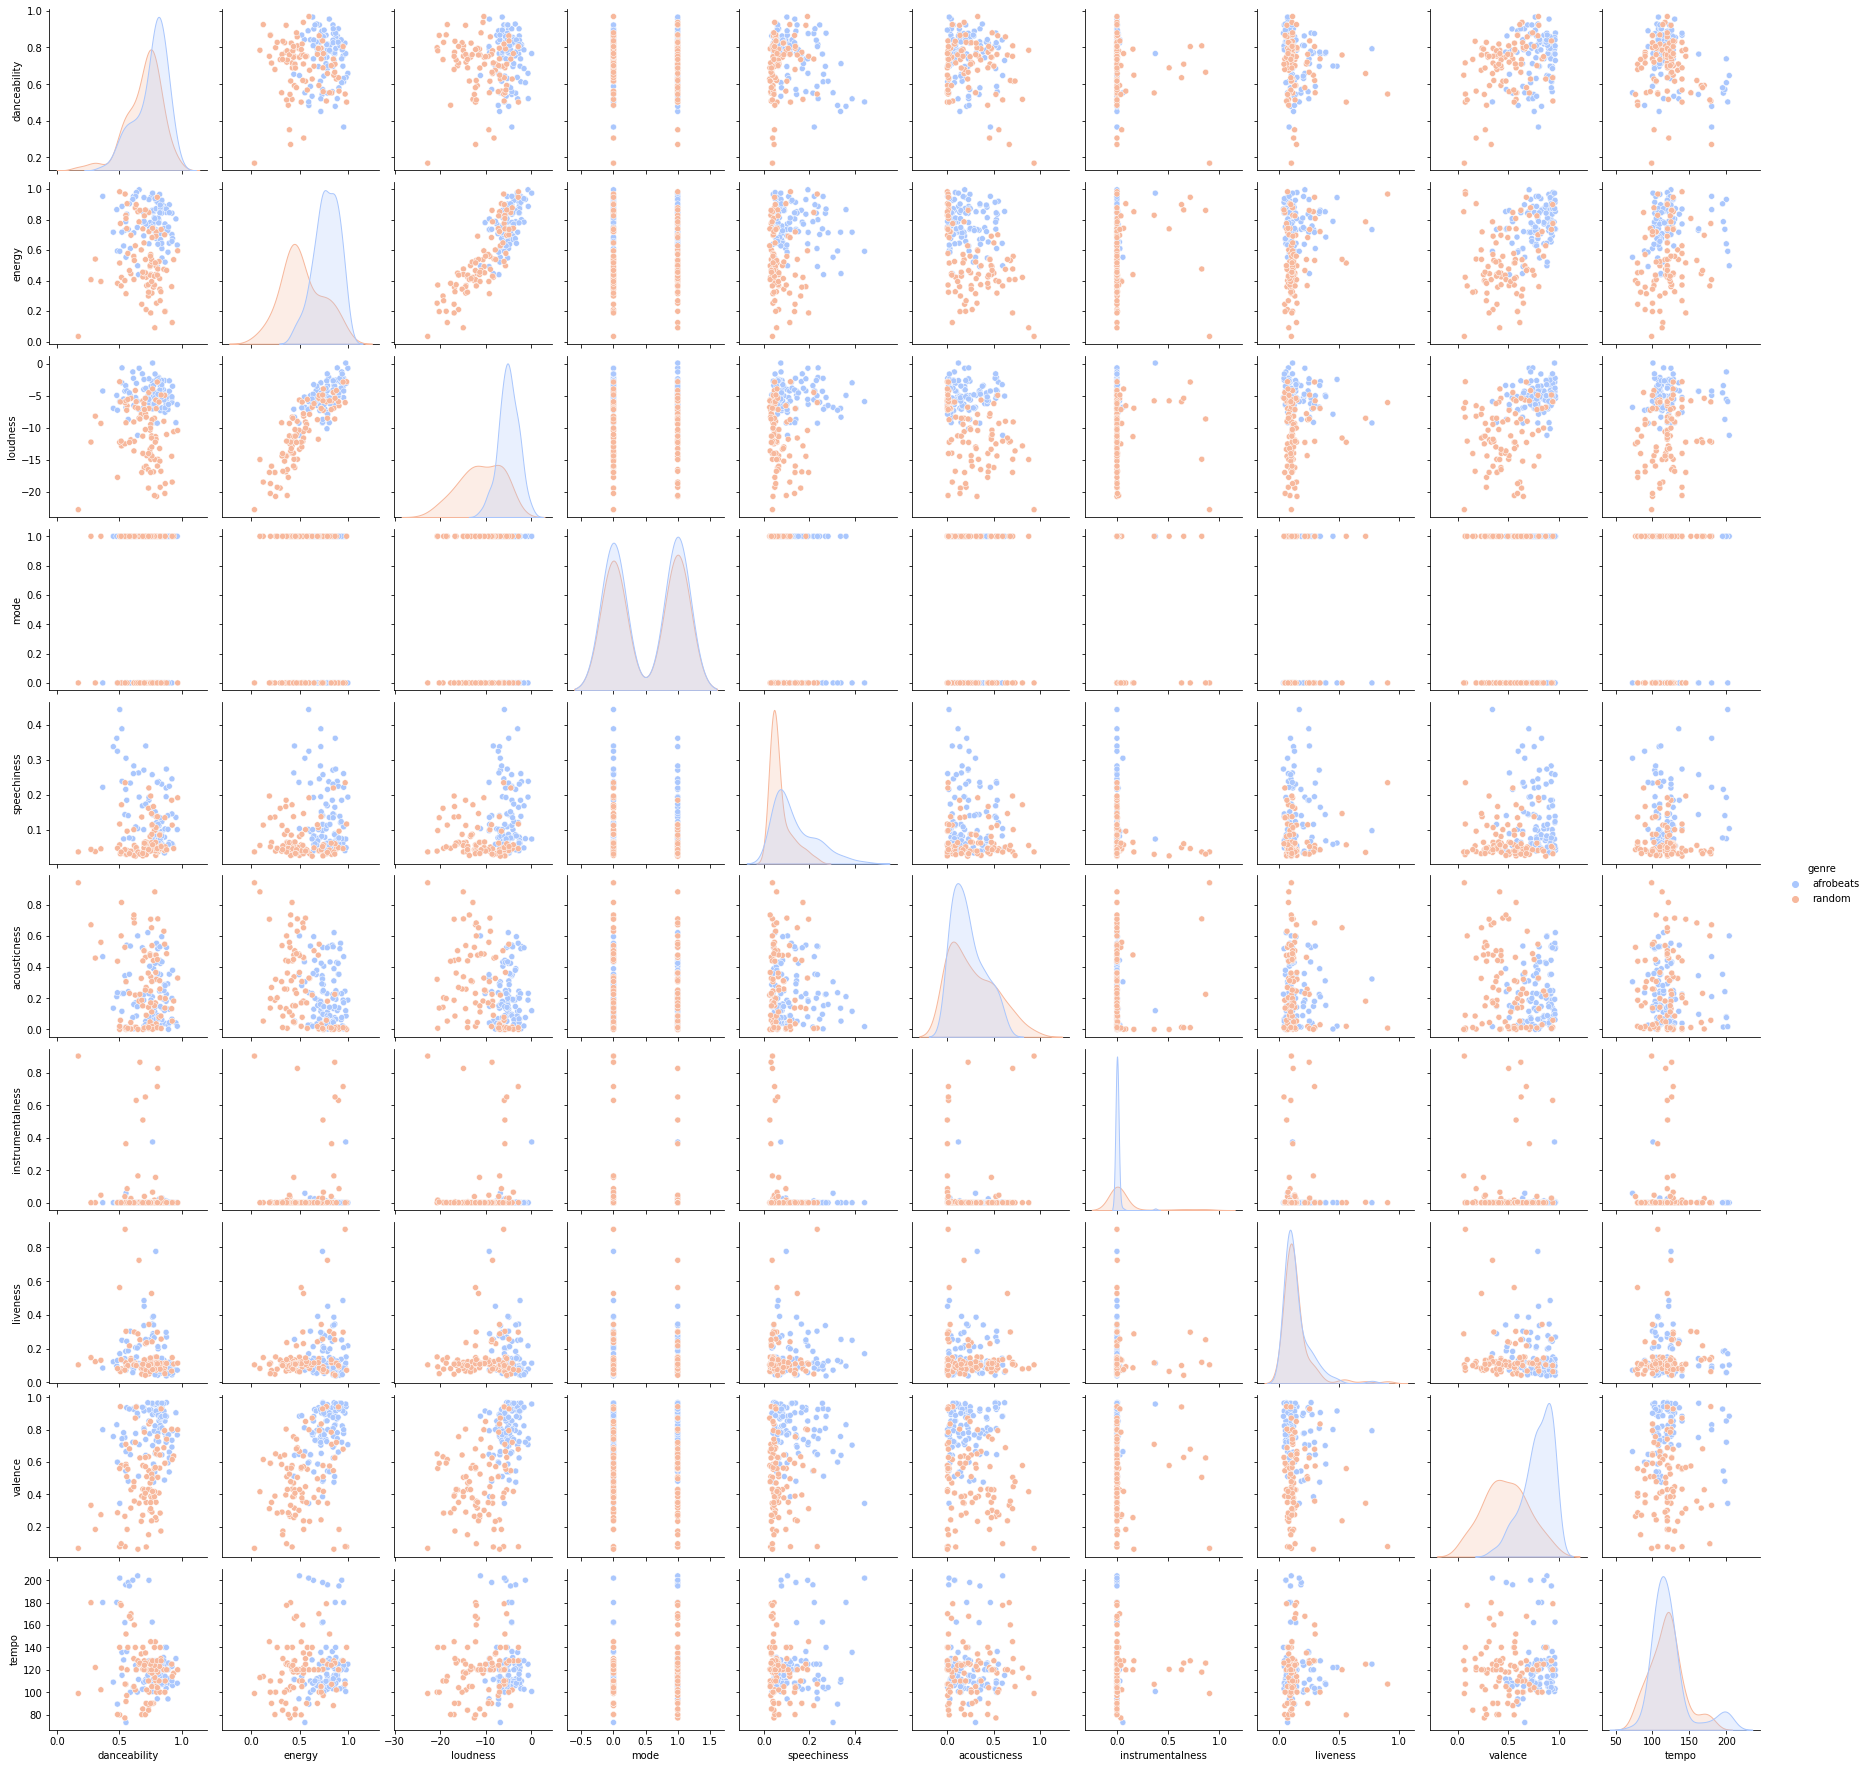

In [320]:
sns.pairplot(df, hue='genre', palette='coolwarm');

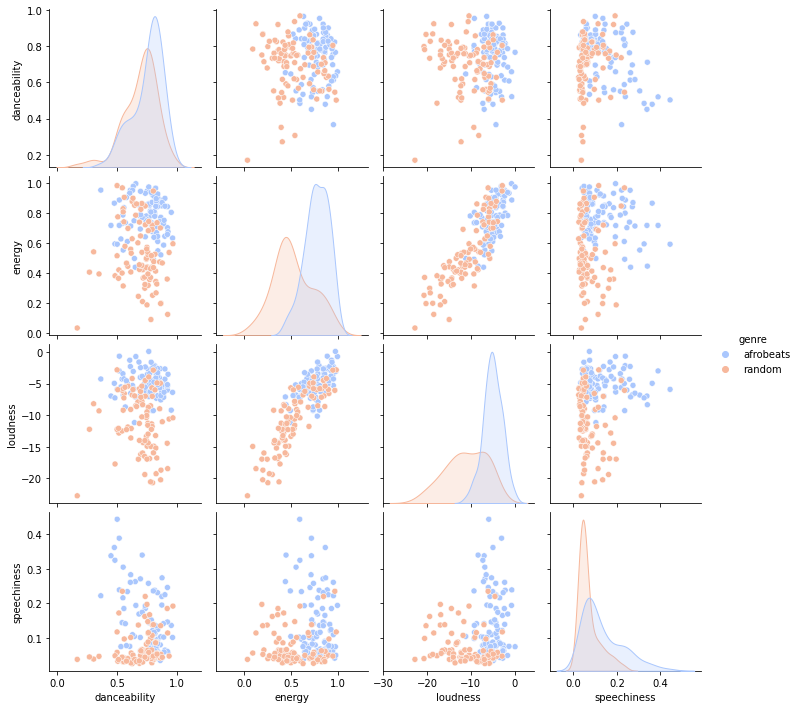

In [321]:
sns.pairplot(df[['danceability', 'energy','loudness','speechiness','genre']], hue='genre', palette='coolwarm');

#### Quick clustering to see how the different genres seperate out 

In [322]:
X = df.drop(columns = ['track_name','genre'])

In [323]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_49416/2484112330.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Reduce the features into 2 dimentions for better visualization

In [324]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=2))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 190 samples in 0.001s...
[t-SNE] Computed neighbors for 190 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 190 / 190
[t-SNE] Mean sigma: 1.433167
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 60.7492599, gradient norm = 0.5412536 (50 iterations in 0.029s)
[t-SNE] Iteration 100: error = 59.1017151, gradient norm = 0.5340916 (50 iterations in 0.023s)
[t-SNE] Iteration 150: error = 60.2263794, gradient norm = 0.5166515 (50 iterations in 0.020s)
[t-SNE] Iteration 200: error = 60.1395340, gradient norm = 0.5363712 (50 iterations in 0.020s)
[t-SNE] Iteration 250: error = 62.0271301, gradient norm = 0.5250591 (50 iterations in 0.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.027130
[t-SNE] Iteration 300: error = 0.8792688, gradient norm = 0.0053678 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 0.6971596, gradient norm = 0.0038727 (

In [325]:
tsne_df

,x,y,genre,cluster,track_name
0,-0.776736,7.070751,afrobeats,6,Oleku (feat. Brymo)
1,-2.536099,3.219362,afrobeats,3,Move Back
2,6.326125,-3.989243,afrobeats,0,Pakurumo
3,1.756845,3.627437,afrobeats,4,The Matter (feat. Wizkid)
4,2.037956,8.273627,afrobeats,4,Slow Down (feat. Wiz Kid)
...,...,...,...,...,...
185,-7.455800,4.113832,random,9,Let's Do It Together - Casati SuperFresh Remix
186,-8.449517,-11.954288,random,6,Sé
187,8.006186,2.688464,random,6,Pelo de mar
188,-2.314984,-6.946086,random,7,A mi lado


#### This function gives the songs in each cluster

In [326]:
def get_song(df,title):
    cluster = df.loc[df['track_name'] == title, 'cluster'].iloc[0]
    lst=[]
    for i in range(len(df)):
        if df.loc[i]['cluster'] == cluster:
            lst.append(df.loc[i]['track_name'])
    return lst, cluster

In [327]:
get_song(tsne_df, 'Priest')

(['Bumper To Bumper',
  'Swagger',
  'Tonight',
  'Ajeei (feat. Nana Boroo & Sarkodie)',
  'Caro (feat. Lax)',
  'Mo Gbono Feli Feli',
  'U Go Kill Me (feat. El)',
  'Final (Baba Nla)',
  'Premier Gaou',
  'Odo',
  'Wadi Mi Sika',
  'Dance For Me (Eugy X Mr Eazi)',
  'Skelewu',
  'Chop My Money - Remix',
  'Akube',
  'Takeover',
  'Antenna - UK Club Mix',
  'Ojuelegba',
  'Mad Over You',
  'Kontrol',
  'Askamaya',
  'Dumebi',
  'Wololo',
  'Priest',
  'Bloody Samaritan',
  'Sophie Bijoux',
  'La playa del sol',
  'So Done',
  'Rock This Party',
  'Power of Rhythm - Casati Remix',
  'Start Again - Casati Remix',
  "Let's Do It Together - Casati SuperFresh Remix"],
 9)

In [328]:
tsne_df[tsne_df['track_name'].str.contains('Mahler')]['track_name'].values

array(['Mahler: Symphony No. 2 in C Minor "Resurrection": I. Allegro maestoso. Mit durchaus ernstem und feierlichem Ausdruck'],
      dtype=object)

In [329]:
tsne_df[tsne_df['track_name']== 'Mahler: Symphony No. 2 in C Minor "Resurrection": I. Allegro maestoso. Mit durchaus ernstem und feierlichem Ausdruck']

,x,y,genre,cluster,track_name
102,-7.386403,-9.668669,random,8,"Mahler: Symphony No. 2 in C Minor ""Resurrectio..."


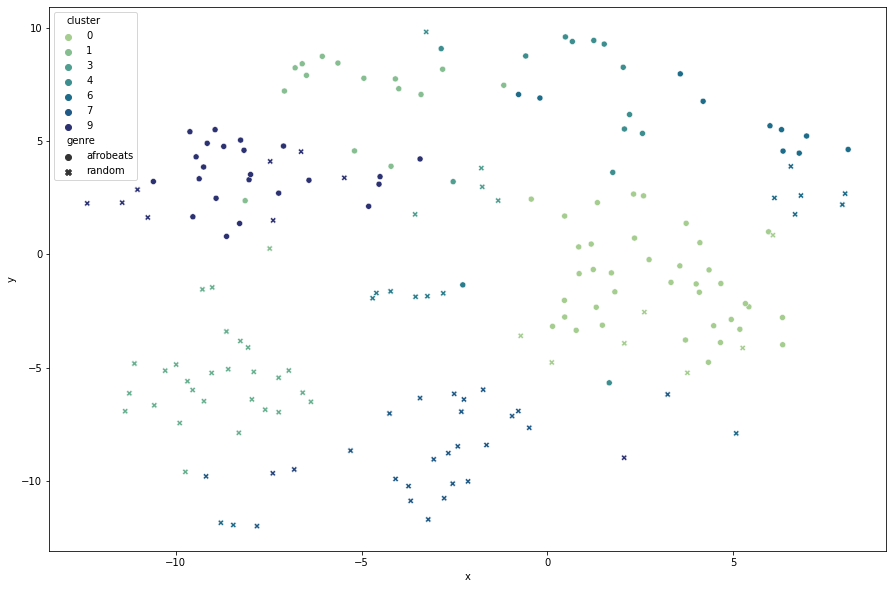

In [331]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['cluster'],style=tsne_df['genre'], palette='crest');

#### EDA with Jacks Playlist

In [332]:
jack = pd.read_csv('../data/jack.csv')
jack.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1YzcrcgR3T2RwAZg5tSvYP,Die Walküre / Erster Aufzug: Orchestervorspiel,Richard Wagner,{'external_urls': {'spotify': 'https://open.sp...,1C1x4MVkql8AiABuTw6DgE,58,"['classical', 'german opera', 'german romantic...",Solti - Wagner - The Operas,17,0.265,...,2,-19.457,0,0.0424,0.924,0.878,0.0916,0.1640,113.033,jack
1,6JmduA0I9QYtD1RiHQgWjj,"Götterdämmerung, WWV 86D, Act III: Siegfrieds ...",Richard Wagner,{'external_urls': {'spotify': 'https://open.sp...,1C1x4MVkql8AiABuTw6DgE,58,"['classical', 'german opera', 'german romantic...","Wagner: Götterdämmerung, WWV 86D",6,0.117,...,5,-20.410,0,0.0364,0.884,0.747,0.0975,0.0396,66.858,jack


In [333]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats


In [334]:
df = pd.concat([afrobeats, jack])

In [335]:
df.reset_index(inplace=True, drop=True)

In [336]:
df.head()

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,{'external_urls': {'spotify': 'https://open.sp...,3tVQdUvClmAT7URs9V3rsp,80,"['afro dancehall', 'afropop', 'azonto', 'niger...",Superstar,49,0.879,...,2,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,{'external_urls': {'spotify': 'https://open.sp...,520qA5VGL9iI0SbmEnTVNg,60,"['afro dancehall', 'afropop', 'azontobeats', '...",The Matter (feat. Wizkid),48,0.697,...,2,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,{'external_urls': {'spotify': 'https://open.sp...,0LFsP7WPfu5inz9a1amcE4,52,"['afro dancehall', 'afropop', 'azonto', 'azont...",Refuse to Be Broke: Da Revolution 2,53,0.520,...,6,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550,afrobeats


In [337]:
features = ['track_name','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']

In [338]:
df = df[features]

#### Quick clustering to see how the different genres seperate out 

In [339]:
X = df.drop(columns = ['track_name','genre'])


In [340]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### Reduce the features into 2 dimentions for better visualization

In [341]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=2))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 1.397778
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 55.9800797, gradient norm = 0.5148453 (50 iterations in 0.045s)
[t-SNE] Iteration 100: error = 57.3599777, gradient norm = 0.5044833 (50 iterations in 0.019s)
[t-SNE] Iteration 150: error = 57.1299896, gradient norm = 0.5355219 (50 iterations in 0.026s)
[t-SNE] Iteration 200: error = 55.9404907, gradient norm = 0.5268133 (50 iterations in 0.016s)
[t-SNE] Iteration 250: error = 55.7729721, gradient norm = 0.5310679 (50 iterations in 0.014s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.772972
[t-SNE] Iteration 300: error = 0.6544635, gradient norm = 0.0093801 (50 iterations in 0.014s)
[t-SNE] Iteration 350: error = 0.3334063, gradient norm = 0.0109019 (

In [342]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,-2.758336,-1.713323,afrobeats,9,Oleku (feat. Brymo)
1,2.131404,2.548982,afrobeats,3,Move Back
2,-1.729679,9.279027,afrobeats,4,Pakurumo
3,-4.264239,3.658924,afrobeats,2,The Matter (feat. Wizkid)
4,-2.303232,0.132268,afrobeats,5,Slow Down (feat. Wiz Kid)


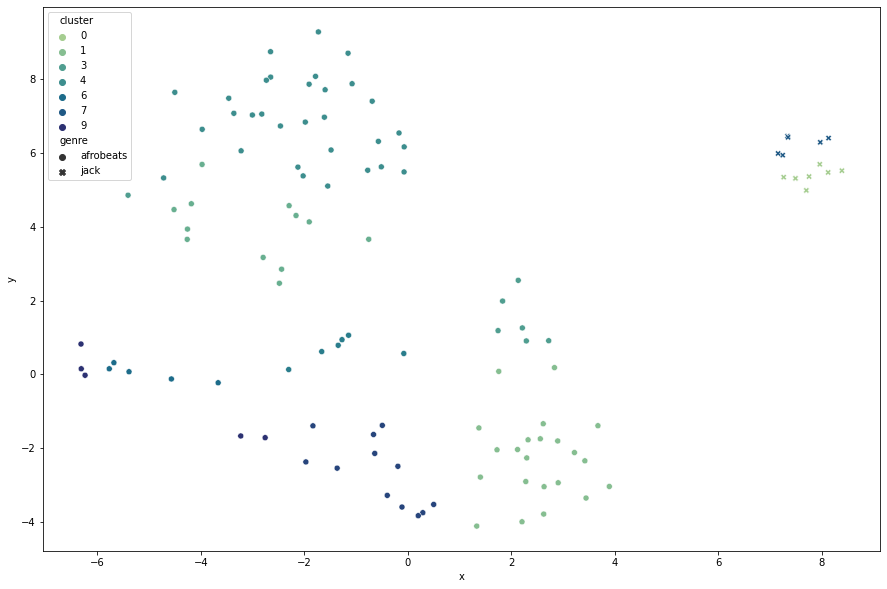

In [343]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['cluster'],style=tsne_df['genre'], palette='crest');

#### This function gives the songs in each cluster

In [344]:
tsne_df[tsne_df['genre']=='jack']

,x,y,genre,cluster,track_name
100,8.119645,5.472311,jack,0,Die Walküre / Erster Aufzug: Orchestervorspiel
101,7.260094,5.342968,jack,0,"Götterdämmerung, WWV 86D, Act III: Siegfrieds ..."
102,7.241582,5.939538,jack,7,Tannhäuser: Overture
103,7.967186,6.287991,jack,7,"Götterdämmerung, WWV 86D, Prologue: Siegfrieds..."
104,7.750978,5.360532,jack,0,"Piano Concerto No. 1 in D Minor, Op. 15: I. Ma..."
105,7.335451,6.455224,jack,7,Symphony No. 1: IV. Stürmisch bewegt
106,7.488155,5.310935,jack,0,"Symphony No.9 in E Minor, Op.95, B.178: 1. Ada..."
107,8.385098,5.519156,jack,0,"Symphony No.9 in E Minor, Op.95, B.178: 4. All..."
108,7.957345,5.692830,jack,0,"Mahler: Symphony No. 2 in C Minor ""Resurrectio..."
109,8.127753,6.402492,jack,7,"Symphony No. 4 in C Minor, Op. 43: III. Largo ..."


## Using Cosine Similarity

In [368]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,-2.758336,-1.713323,afrobeats,9,Oleku (feat. Brymo)
1,2.131404,2.548982,afrobeats,3,Move Back
2,-1.729679,9.279027,afrobeats,4,Pakurumo
3,-4.264239,3.658924,afrobeats,2,The Matter (feat. Wizkid)
4,-2.303232,0.132268,afrobeats,5,Slow Down (feat. Wiz Kid)


In [370]:
tsne_df[['x','y']]

,x,y
0,-2.758336,-1.713323
1,2.131404,2.548982
2,-1.729679,9.279027
3,-4.264239,3.658924
4,-2.303232,0.132268
...,...,...
108,7.957345,5.692830
109,8.127753,6.402492
110,7.344822,6.424137
111,7.698193,4.984628


In [371]:
similarities = cosine_similarity(tsne_df[['x','y']])

In [372]:
similarities

array([[ 1.0000001 , -0.9496875 , -0.3630407 , ..., -0.9867758 ,
        -0.99982333, -0.9900698 ],
       [-0.9496875 ,  1.0000001 ,  0.636606  , ...,  0.9878954 ,
         0.95540714,  0.98428535],
       [-0.3630407 ,  0.636606  ,  1.        , ...,  0.509272  ,
         0.38049182,  0.4904212 ],
       ...,
       [-0.9867758 ,  0.9878954 ,  0.509272  , ...,  1.        ,
         0.9896484 ,  0.99976313],
       [-0.99982333,  0.95540714,  0.38049182, ...,  0.9896484 ,
         1.        ,  0.9925374 ],
       [-0.9900698 ,  0.98428535,  0.4904212 , ...,  0.99976313,
         0.9925374 ,  0.99999994]], dtype=float32)

In [380]:
recommender_df = pd.DataFrame(similarities, 
                              columns=tsne_df['track_name'],
                             index=tsne_df['track_name'])

array(['afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats',
       'afrobeats', 'afrobeats', 'afrobeats', 'afrobeats', 'afro

In [383]:
recommender_df['genre'] =  tsne_df['genre'].values

In [384]:
recommender_df.head()

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,"Piano Concerto No. 1 in D Minor, Op. 15: I. Maestoso - Poco più moderato",Symphony No. 1: IV. Stürmisch bewegt,"Symphony No.9 in E Minor, Op.95, B.178: 1. Adagio - Allegro molto","Symphony No.9 in E Minor, Op.95, B.178: 4. Allegro con fuoco","Mahler: Symphony No. 2 in C Minor ""Resurrection"": I. Allegro maestoso. Mit durchaus ernstem und feierlichem Ausdruck","Symphony No. 4 in C Minor, Op. 43: III. Largo - Allegro","Symphony No. 4 in E-Flat Major, WAB 104, ""Romantic"": III. Scherzo - Live",Messa da Requiem: 2a. Dies irae,"Der Freischütz, J. 277: Overture",genre
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,-0.949687,-0.363041,0.301082,0.817819,0.230126,-0.311019,-0.973195,0.783308,-0.122218,...,-0.998788,-0.986281,-0.998135,-0.999654,-0.997877,-0.993802,-0.986776,-0.999823,-0.990070,afrobeats
Move Back,-0.949687,1.000000,0.636606,0.012733,-0.596434,0.086246,0.593037,0.852201,-0.938593,0.426920,...,0.963952,0.988360,0.967035,0.957596,0.968070,0.978618,0.987895,0.955407,0.984285,afrobeats
Pakurumo,-0.363041,0.636606,1.000000,0.779233,0.239311,0.823220,0.998473,0.139019,-0.863595,0.969158,...,0.408463,0.511874,0.419243,0.387421,0.422958,0.464370,0.509272,0.380492,0.490421,afrobeats
The Matter (feat. Wizkid),0.301082,0.012733,0.779233,1.000000,0.795003,0.997291,0.812661,-0.512321,-0.356950,0.909652,...,-0.253780,-0.139534,-0.242308,-0.275897,-0.238333,-0.193210,-0.142530,-0.283103,-0.164038,afrobeats
Slow Down (feat. Wiz Kid),0.817819,-0.596434,0.239311,0.795003,1.000000,0.748232,0.292577,-0.928246,0.282868,0.471209,...,-0.788502,-0.711602,-0.781164,-0.802400,-0.778601,-0.748778,-0.713724,-0.806857,-0.728799,afrobeats
